In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

In [7]:

# Generate synthetic time series data
def generate_time_series(batch_size, n_steps):
    freq1, freq2 = np.random.rand(2, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - 0.2) * freq1) + 0.5 * np.sin((time - 0.2) * freq2)
    return series[..., np.newaxis].astype(np.float32)

In [8]:

# Parameters
TIME_STEPS = 20
BATCH_SIZE = 64

In [9]:

# Generate train/test data
X_train = generate_time_series(BATCH_SIZE * 1000, TIME_STEPS + 1)
X_test = generate_time_series(BATCH_SIZE * 200, TIME_STEPS + 1)

In [10]:

# Split into input (t0...t19) and target (t20)
X_train, y_train = X_train[:, :TIME_STEPS], X_train[:, -1]
X_test, y_test = X_test[:, :TIME_STEPS], X_test[:, -1]

In [11]:

# Build Bidirectional LSTM model
model = Sequential([
    Bidirectional(LSTM(32, return_sequences=False), input_shape=[TIME_STEPS, 1]),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:

# Train
history = model.fit(X_train, y_train, epochs=10, batch_size=BATCH_SIZE, validation_data=(X_test, y_test))

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - loss: 0.0112 - mae: 0.0427 - val_loss: 9.3239e-06 - val_mae: 0.0024
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.0006e-05 - mae: 0.0024 - val_loss: 9.1577e-06 - val_mae: 0.0024
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0312e-05 - mae: 0.0025 - val_loss: 1.0242e-05 - val_mae: 0.0023
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 1.0411e-05 - mae: 0.0025 - val_loss: 9.7413e-06 - val_mae: 0.0026
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.0671e-05 - mae: 0.0025 - val_loss: 9.2183e-06 - val_mae: 0.0025
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 1.0144e-05 - mae: 0.0024 - val_loss: 1.0136e-05 - val_mae: 0.0027
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.0366e-05 - mae: 0.0025 - val_loss: 1.6689e-05 - val_mae: 0.0037
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 8.8081e-06 - mae: 0.0023 - val_loss: 6.

In [13]:

# Predictions
y_pred = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step


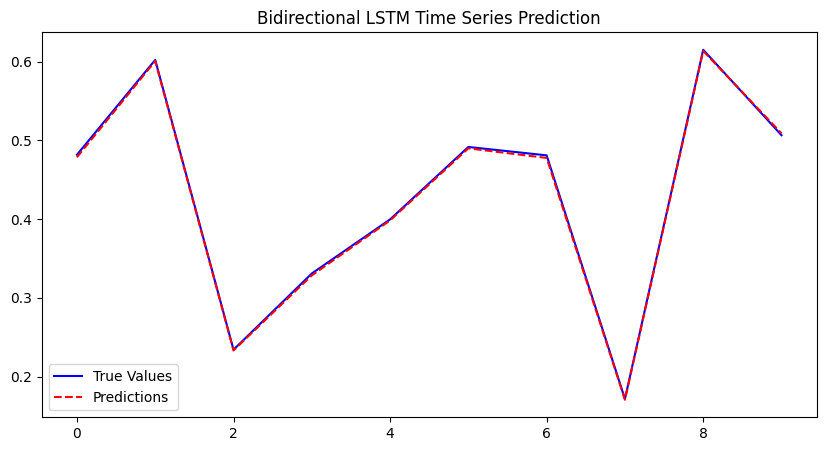

In [14]:

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test[:10], "b-", label="True Values")
plt.plot(y_pred, "r--", label="Predictions")
plt.legend()
plt.title("Bidirectional LSTM Time Series Prediction")
plt.show()